# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [8]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [9]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set the Mapbox API
px.set_mapbox_access_token(mapbox_token)


# Import Data

In [10]:
# Import the CSVs to Pandas DataFrames
file_path = Path("data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [11]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # Calculate the mean number of housing units per year
    sfo_data_group = sfo_data.groupby(['year']).mean()
    sfo_data_housing_units = sfo_data_group['housing_units']

    # Use the Pandas plot function to plot the average housing units per year.
    fig_housing_units = plt.figure(figsize=(8, 5))
    plt.subplot()
    plt.bar(sfo_data_housing_units.index, sfo_data_housing_units)
    plt.title('Housing Units in San Francisco from 2010 to 2016', fontweight='bold')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Housing Units', fontweight='bold')

    # Determine the y axis limits based on minimum and maximum values and standard deviation
    low = sfo_data_housing_units.min() - sfo_data_housing_units.std()
    high = sfo_data_housing_units.max() + sfo_data_housing_units.std()
    plt.ylim(low , high)

    plt.close(fig_housing_units)

    return fig_housing_units

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # Calculate the mean number of housing units per year
    sfo_data_group = sfo_data.groupby(['year']).mean()

    # Calculate the average gross rent and average sale price per square foot
    sfo_data_sale_price_and_gross_rent = pd.concat([sfo_data_group['sale_price_sqr_foot'], sfo_data_group['gross_rent']], axis='columns', join='inner')

    # Plot the Average Gross Rent per Year as a Line Chart
    fig_gross_rent = plt.figure(figsize=(8, 5))
    plt.subplot()
    plt.plot(sfo_data_sale_price_and_gross_rent.index, sfo_data_sale_price_and_gross_rent['gross_rent'])
    plt.title('Average Gross Rent in San Francisco', fontweight='bold')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Gross Rent', fontweight='bold')

    plt.xlim(sfo_data_sale_price_and_gross_rent.index.min() , sfo_data_sale_price_and_gross_rent.index.max())

    plt.close(fig_gross_rent)

    return fig_gross_rent

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # Calculate the mean number of housing units per year
    sfo_data_group = sfo_data.groupby(['year']).mean()

    # Calculate the average gross rent and average sale price per square foot
    sfo_data_sale_price_and_gross_rent = pd.concat([sfo_data_group['sale_price_sqr_foot'], sfo_data_group['gross_rent']], axis='columns', join='inner')

    # Plot the Average Sales Price per Year as a line chart
    fig_sales_price = plt.figure(figsize=(8, 5))
    plt.subplot()
    plt.plot(sfo_data_sale_price_and_gross_rent.index, sfo_data_sale_price_and_gross_rent['sale_price_sqr_foot'])
    plt.title('Average Sale Price per Square Foot in San Francisco', fontweight='bold')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Average Sale Price', fontweight='bold')

    plt.xlim(sfo_data_sale_price_and_gross_rent.index.min() , sfo_data_sale_price_and_gross_rent.index.max())
    
    plt.close(fig_sales_price)

    return fig_sales_price

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # Group by year and neighborhood and then create a new dataframe of the mean values
    sfo_data.reset_index()
    sfo_data_mean_values = sfo_data.groupby(['year', 'neighborhood']).mean()
    
    # Use hvplot to create an interactive line chart of the average price per sq ft.
    # The plot should have a dropdown selector for the neighborhood
    return sfo_data_mean_values.hvplot(
        kind='line',
        x='year',
        y='sale_price_sqr_foot',
        groupby='neighborhood',
        xlabel='Year',
        ylabel='Average Price Per Square Foot',
        title='Average Price Per Square Foot'
        )

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # Getting the data from the top 10 expensive neighborhoods
    sfo_data.reset_index()
    sfo_data_neighborhood = sfo_data.groupby('neighborhood').mean()
    sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False)
    sfo_data_top_ten = sfo_data_neighborhood[0:10].reset_index()

    # Plotting the data from the top 10 expensive neighborhoods
    return sfo_data_top_ten.hvplot(
        kind='bar',
        x='neighborhood',
        y='sale_price_sqr_foot',
        xlabel='Neighborhood',
        ylabel='Sale Price Per Square Foot',
        title='Top 10 Expensive Neighborhoods',
        rot=90,
        height=500)

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # Getting the data from the top 10 expensive neighborhoods
    sfo_data.reset_index()
    sfo_data_neighborhood = sfo_data.groupby('neighborhood').mean()
    sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False)
    sfo_data_top_ten = sfo_data_neighborhood[0:10].reset_index()

    # Parallel Coordinates Plot
    return px.parallel_coordinates(
        sfo_data_top_ten,
        dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "sale_price_sqr_foot": "Sale Price Per Sqr Ft",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent"
        },
    )

def parallel_categories():
    """Parallel Categories Plot."""
    
    # Getting the data from the top 10 expensive neighborhoods
    sfo_data.reset_index()
    sfo_data_neighborhood = sfo_data.groupby('neighborhood').mean()
    sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False)
    sfo_data_top_ten = sfo_data_neighborhood[0:10].reset_index()

    # Parallel Categories Plot
    return px.parallel_categories(
        sfo_data_top_ten,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sale Price Per Sqr Ft",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent"
        },
    )

def neighborhood_map():
    """Neighborhood Map"""
    
    sfo_data.reset_index()
    sfo_data_neighborhood = sfo_data.groupby('neighborhood').mean()
    sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=False)

    # Calculate the mean values for each neighborhood
    sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='neighborhood', ascending=True)
    sfo_data_neighborhood = sfo_data_neighborhood.reset_index()

    # Join the average values with the neighborhood locations
    sfo_data_neighborhood_coordinates = pd.concat([sfo_data_neighborhood, df_neighborhood_locations], axis='columns', join='inner')
    sfo_data_neighborhood_coordinates = sfo_data_neighborhood_coordinates.drop('neighborhood', axis=1)

    # Create a scatter mapbox to analyze neighborhood info
    neighborhood_map = px.scatter_mapbox(
        sfo_data_neighborhood_coordinates,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        zoom=11,
        mapbox_style="basic",
        title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
        height=500
    )
    return neighborhood_map



## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [12]:
# Put neighborhood map in one row
neighborhood_row = pn.Row(neighborhood_map)

# Put yearly markets plots in two rows and in one column
price_row = pn.Row(average_sales_price, average_gross_rent)
units_row = pn.Row(housing_units_per_year)
price_units_column = pn.Column(price_row, units_row)

# Put neighborhood analaysis plots in a column
neighborhood_analysis_column = pn.Column(average_price_by_neighborhood, top_most_expensive_neighborhoods)

# Put parallel plots in a column
parallel_plots_column = pn.Column(parallel_coordinates, parallel_categories)

# Create tabs
neighborhood_panel = pn.Tabs(
    ("Welcome", neighborhood_row),
    ("Yearly Market Analysis", price_units_column),
    ("Neighborhood Analysis", neighborhood_analysis_column),
    ("Parallel Plots Analysis", parallel_plots_column)
)


## Serve the Panel Dashboard

Tabs
    [0] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive01904')
    [1] Column
        [0] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive01911')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive01917')
        [1] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive01924')
    [2] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive01932')
                    [0] HoloViews(DynamicMap, name='interactive01932')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive01970')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive02056')
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive02062')
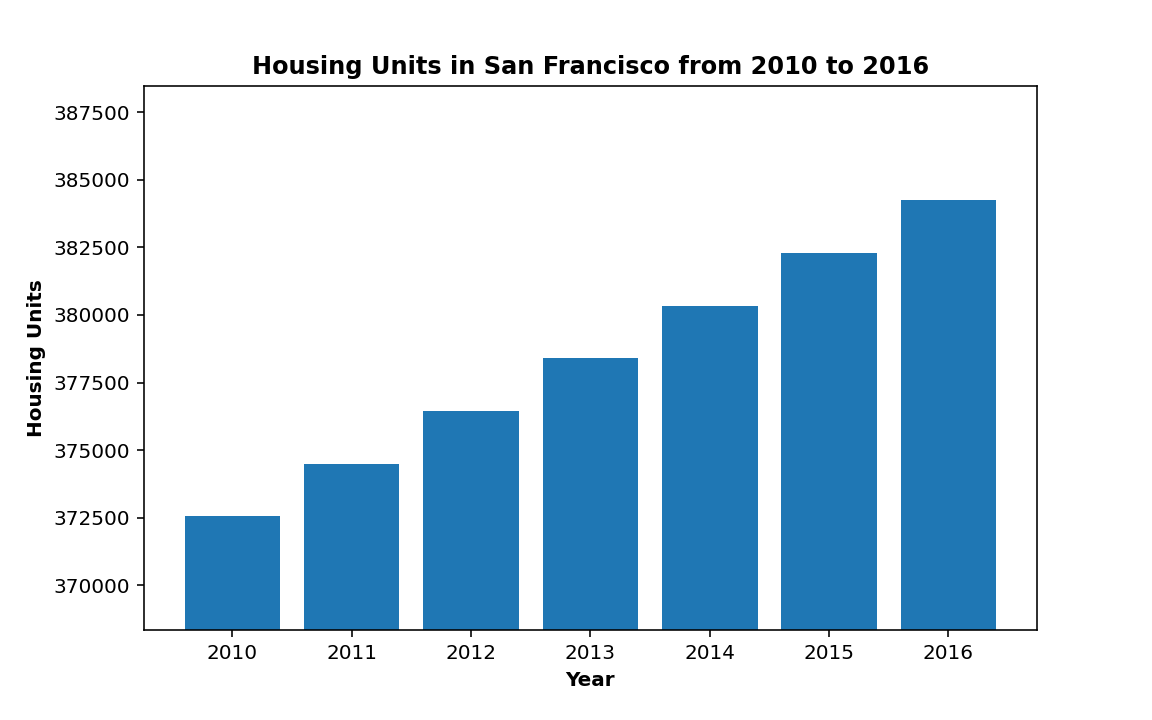
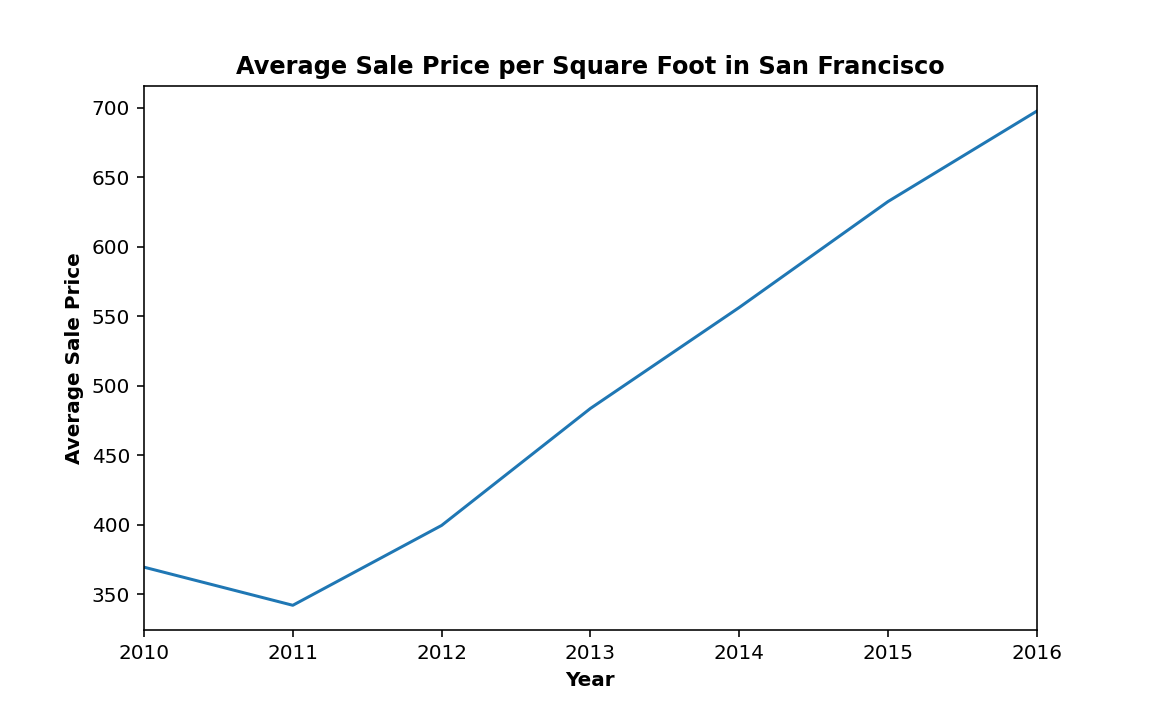
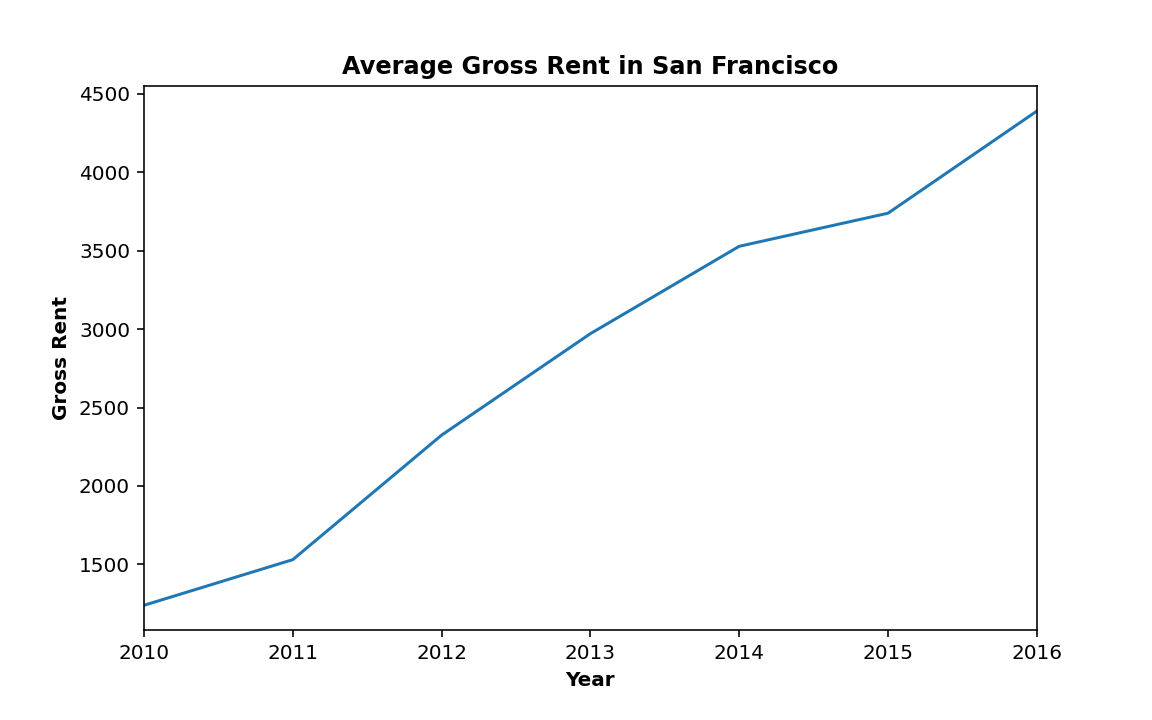

In [13]:
neighborhood_panel.servable()
